In [3]:
library(rcompanion)
library(readxl)
library(ggplot2)
library(IntroCompFinR)
library(methods)
library(dplyr)
library(lubridate)
library(corrplot)
library(gmodels)
library(matrixStats)
library(scales)

In [4]:
GoldmanSachs = read_xlsx(r"(C:\Users\Mary\Documents\Data Science Classes\Final Project\Excel Master Data Sets\GS Master.xlsx)")
MorganStanley = read_xlsx(r"(C:\Users\Mary\Documents\Data Science Classes\Final Project\Excel Master Data Sets\MS Master.xlsx)")
Schwab = read_xlsx(r"(C:\Users\Mary\Documents\Data Science Classes\Final Project\Excel Master Data Sets\SCHW Master.xlsx)")

In [5]:
GoldmanSachs$Day <- lubridate::day(GoldmanSachs$Date)
GoldmanSachs$Month <- lubridate::month(GoldmanSachs$Date)
GoldmanSachs$Year <- lubridate::year(GoldmanSachs$Date)
MorganStanley$Day <- lubridate::day(MorganStanley$Date)
MorganStanley$Month <- lubridate::month(MorganStanley$Date)
MorganStanley$Year <- lubridate::year(MorganStanley$Date)
Schwab$Day <- lubridate::day(Schwab$Date)
Schwab$Month <- lubridate::month(Schwab$Date)
Schwab$Year <- lubridate::year(Schwab$Date)

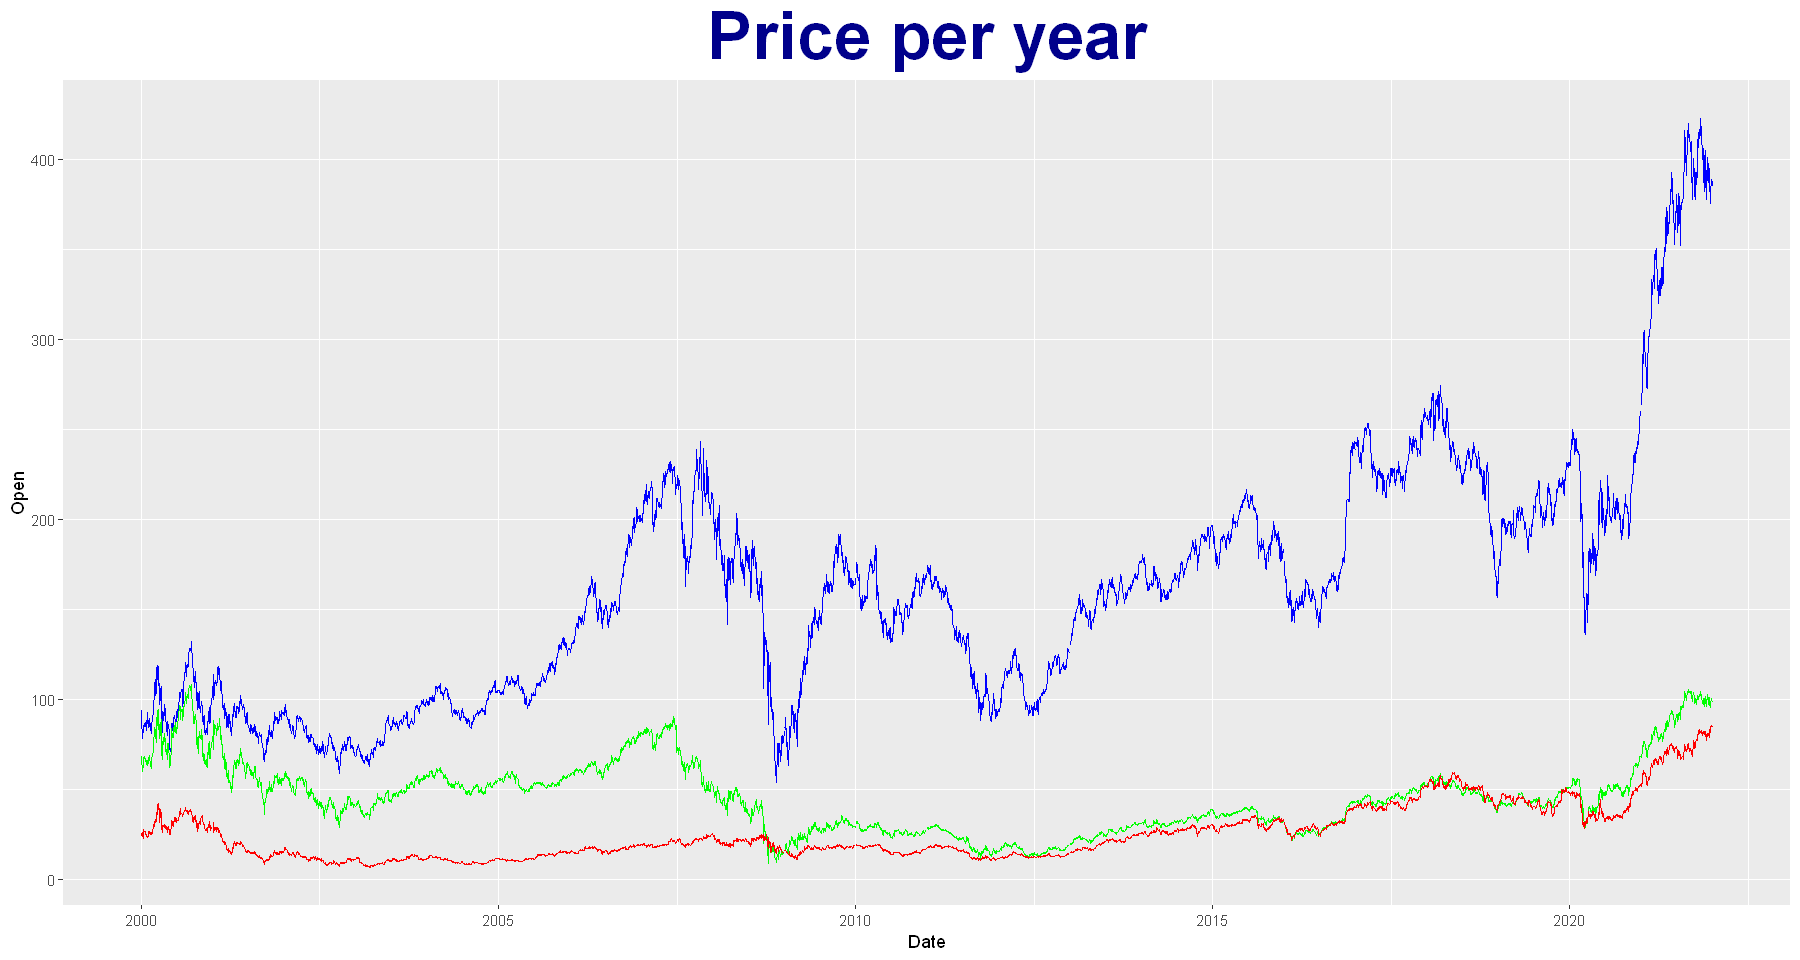

In [12]:
# Stock Price per Year for Goldman Sachs, Morgan Stanley, and Schwab

options(repr.plot.width=15, repr.plot.height=8)

ggplot() +
  geom_line(data = GoldmanSachs, aes(x = Date, y = Open, group = Year), color = "blue") + # must include argument label "data"
  geom_line(data = MorganStanley, aes(x = Date, y = Open, group = Year), color = "green") +
  geom_line(data = Schwab, aes(x = Date, y = Open, group = Year), color = "red") +
  ggtitle("Price per year") +
  theme(plot.title = element_text(size = 40, face = "bold", color="darkblue", hjust=0.5))

In [28]:
GoldmanSachsYear = aggregate(Open ~ Year, data = GoldmanSachs, FUN = sum)
MorganStanleyYear = aggregate(Open ~ Year, data = MorganStanley, FUN = sum)
SchwabYear = aggregate(Open ~ Year, data = Schwab, FUN = sum)

NULL

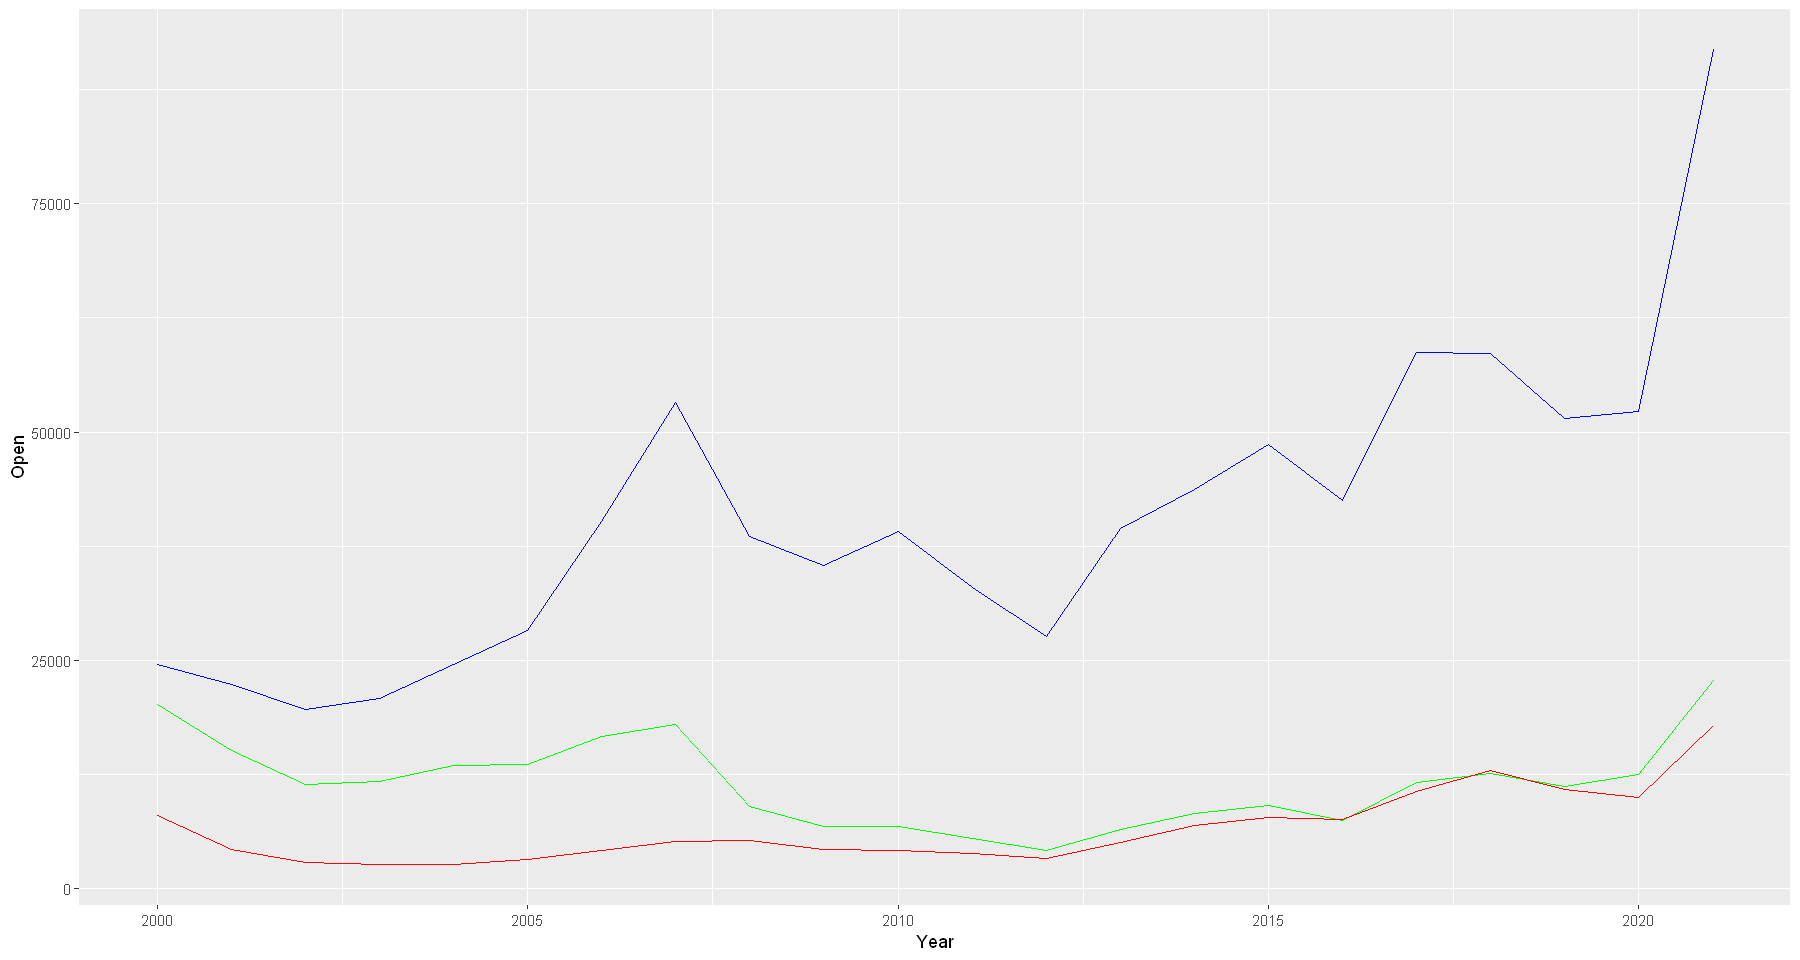

In [21]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot() + 
  geom_line(data = GoldmanSachsYear, aes(x = Year, y = Open), color = "blue") +
  geom_line(data = MorganStanleyYear, aes(x = Year, y = Open), color = "green") +
  geom_line(data = SchwabYear, aes(x = Year, y = Open), color = "red")
  ggtitle("Price by Year") +
  theme(plot.title = element_text(size = 40, face = "bold", color="darkblue", hjust=0.5))

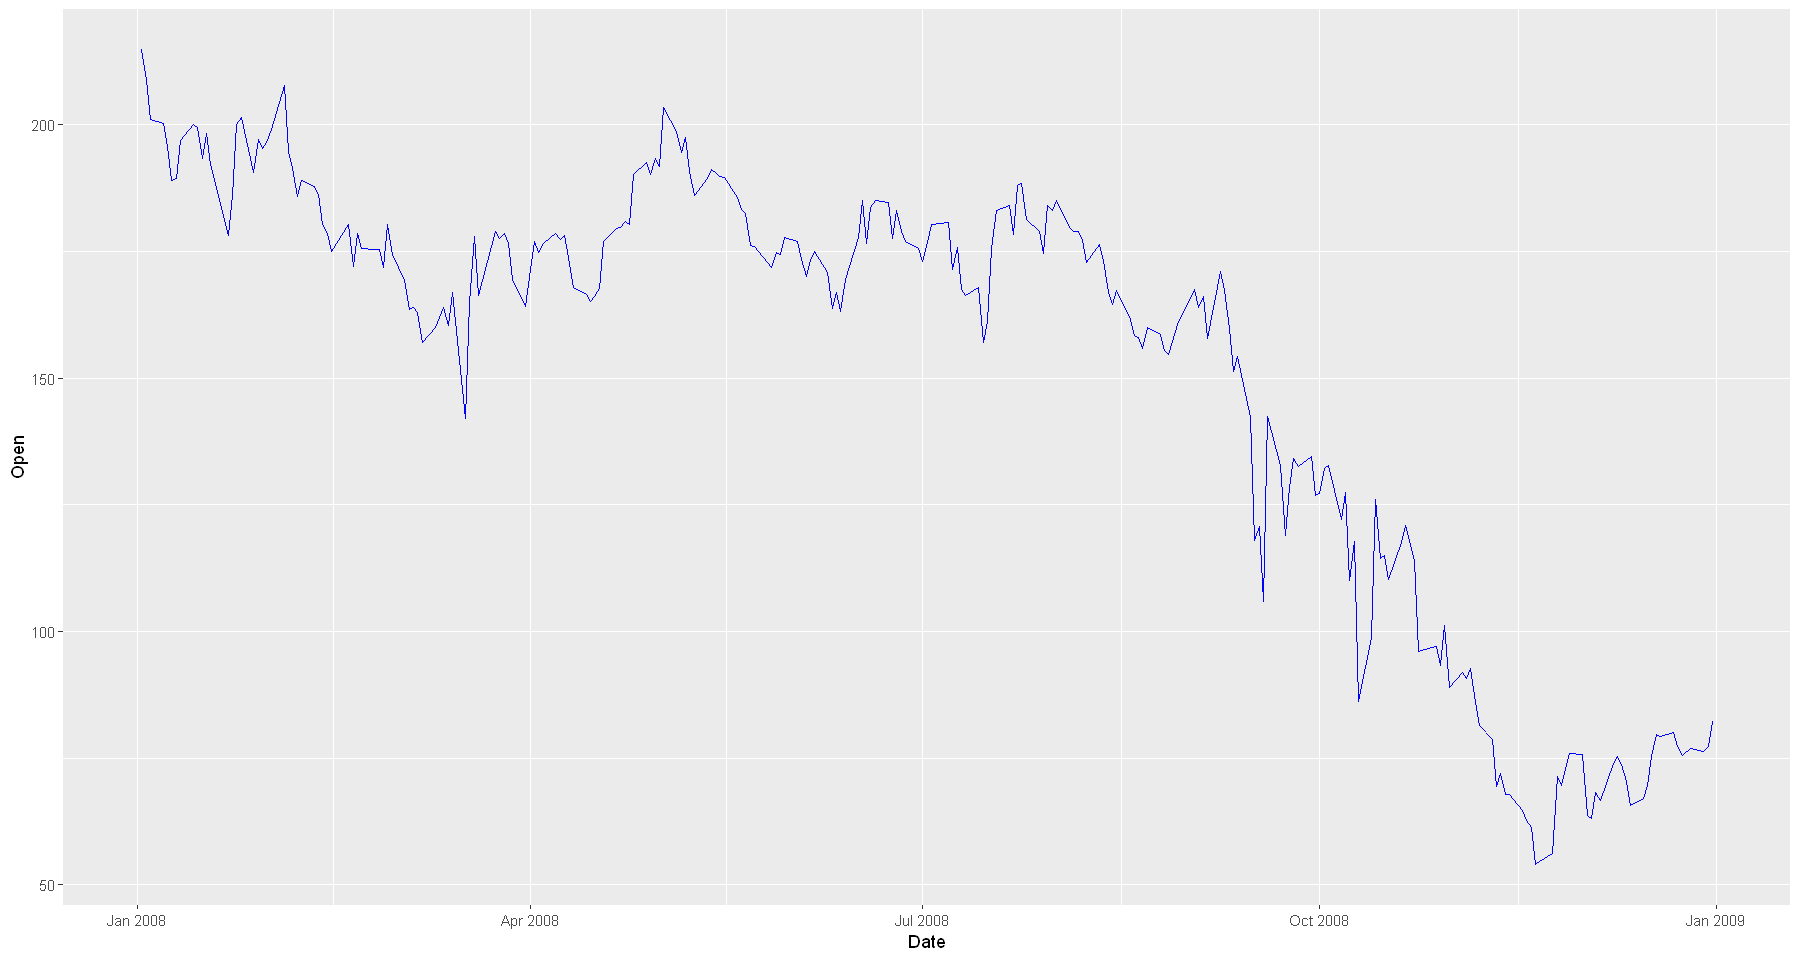

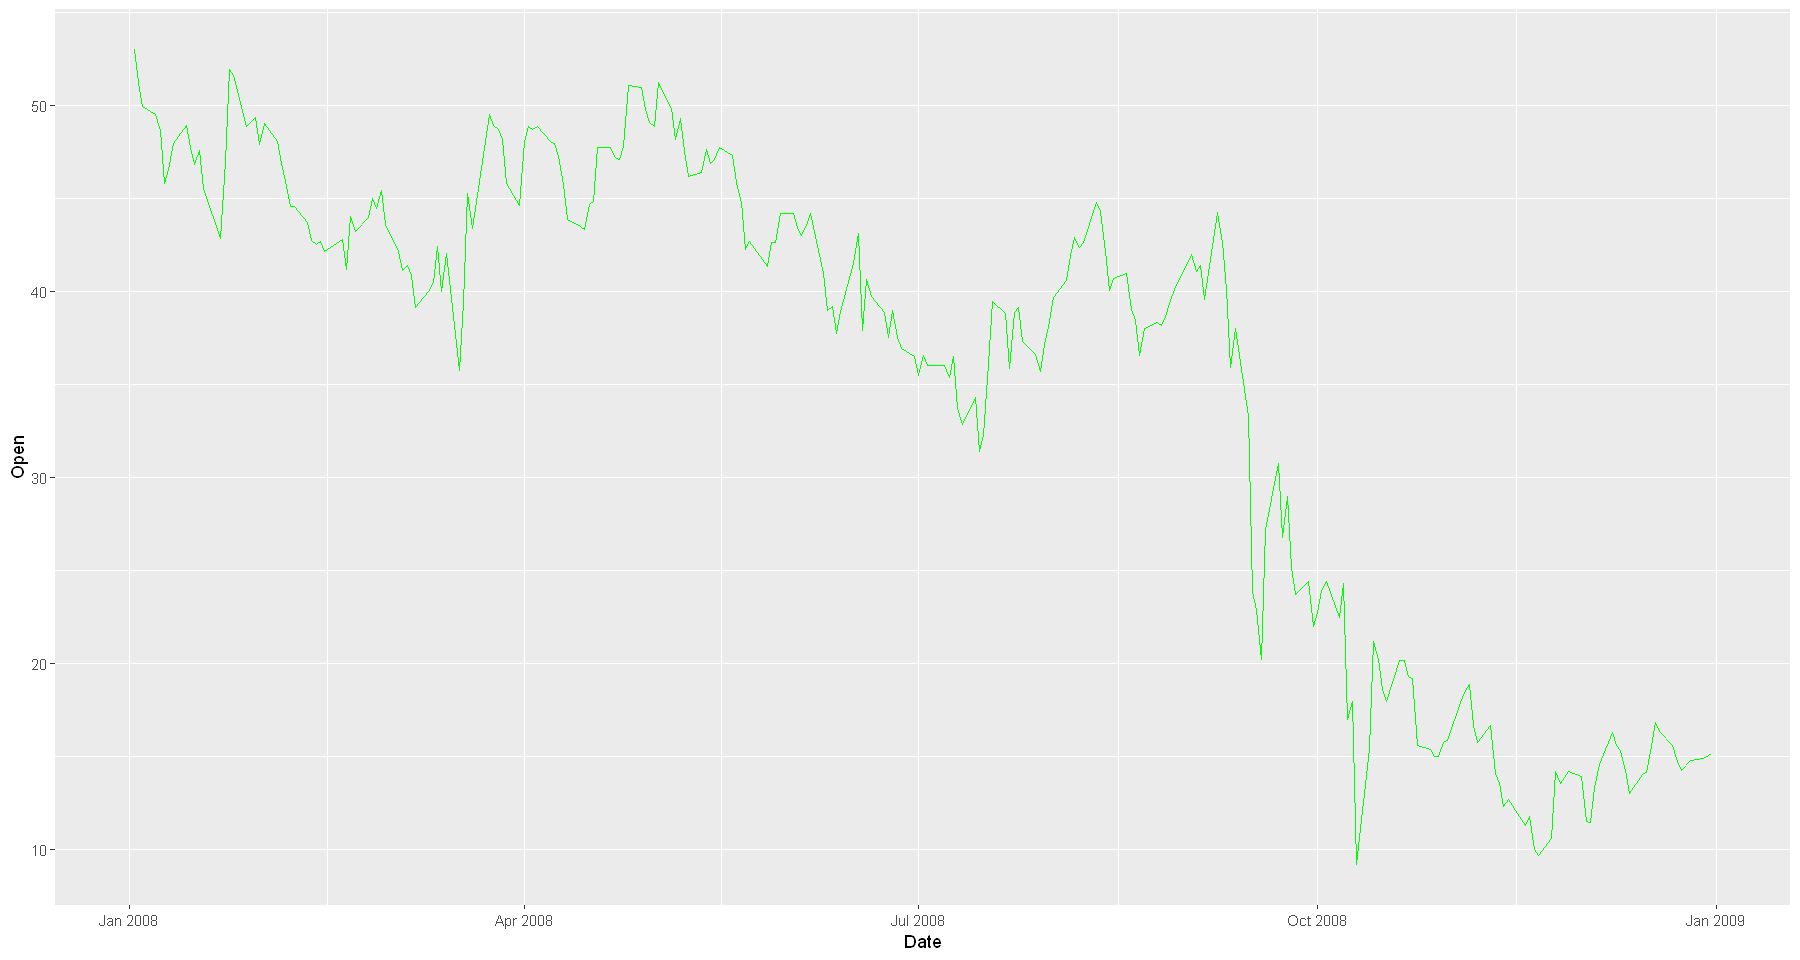

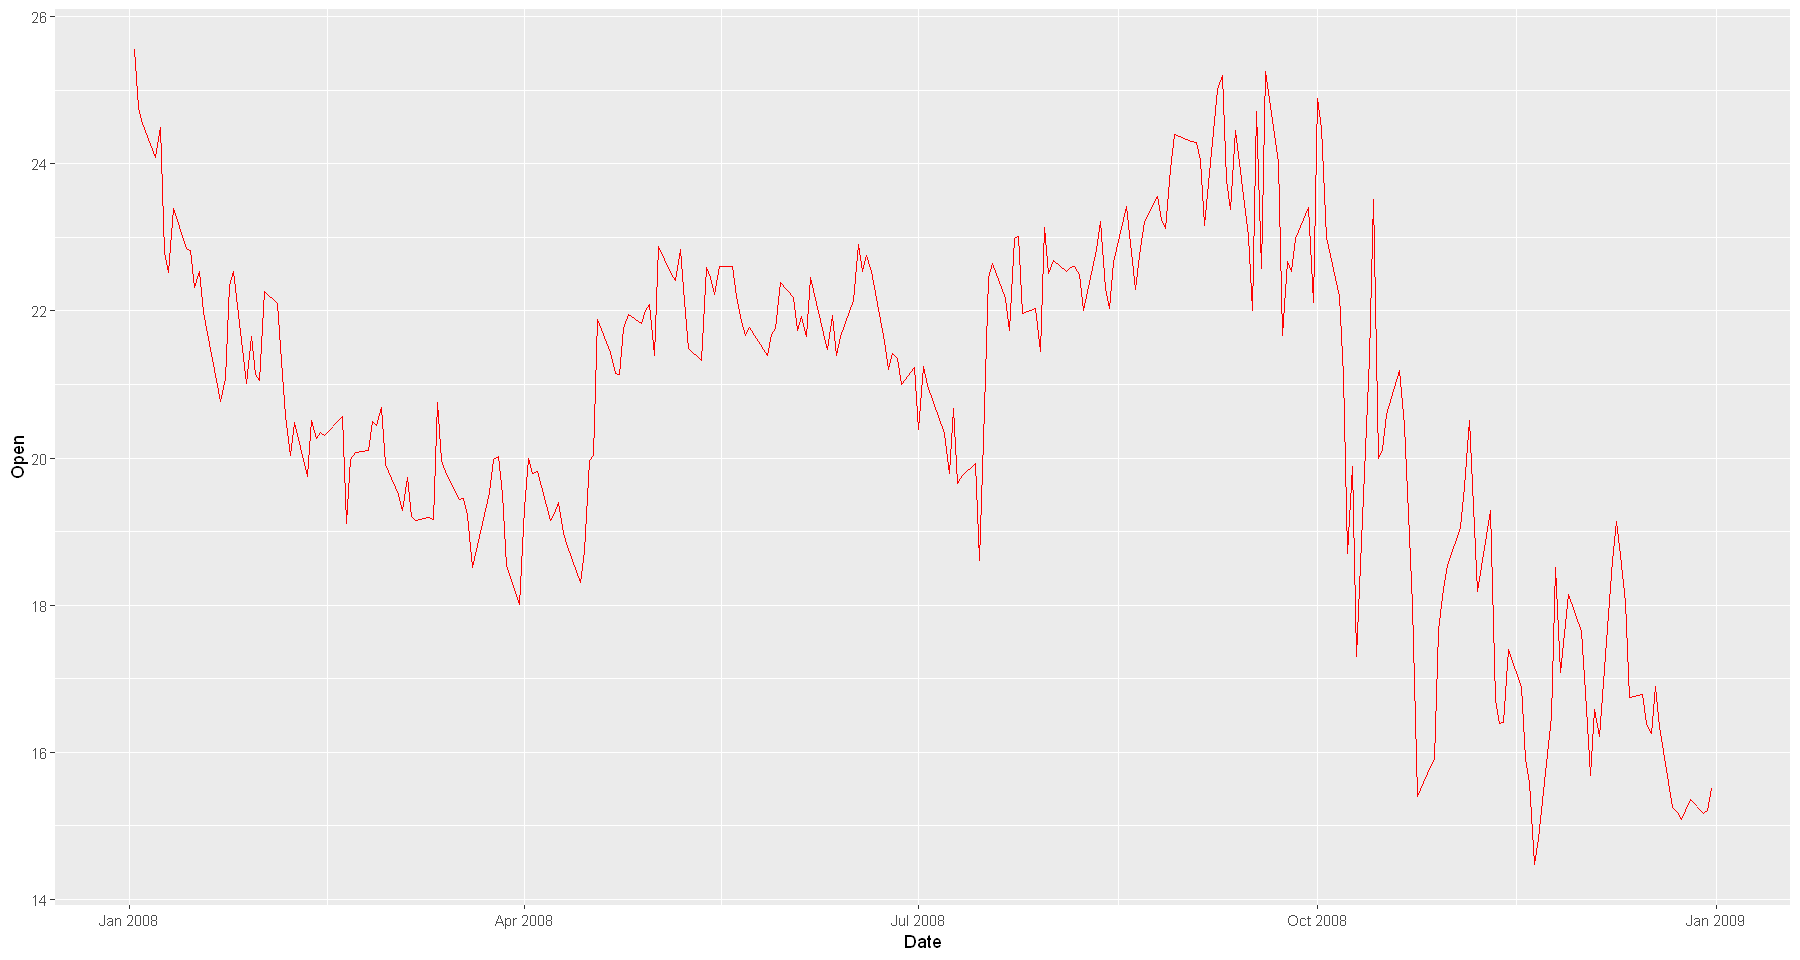

In [8]:
# Using group by to Create a Line Graph with 2008 from the Great Depression
options(repr.plot.width=15, repr.plot.height=8)

GoldmanSachs %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "blue")

MorganStanley %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "green")

Schwab %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  ggplot(aes(x = Date, y = Open, group = Year)) +
  geom_line(color = "red")

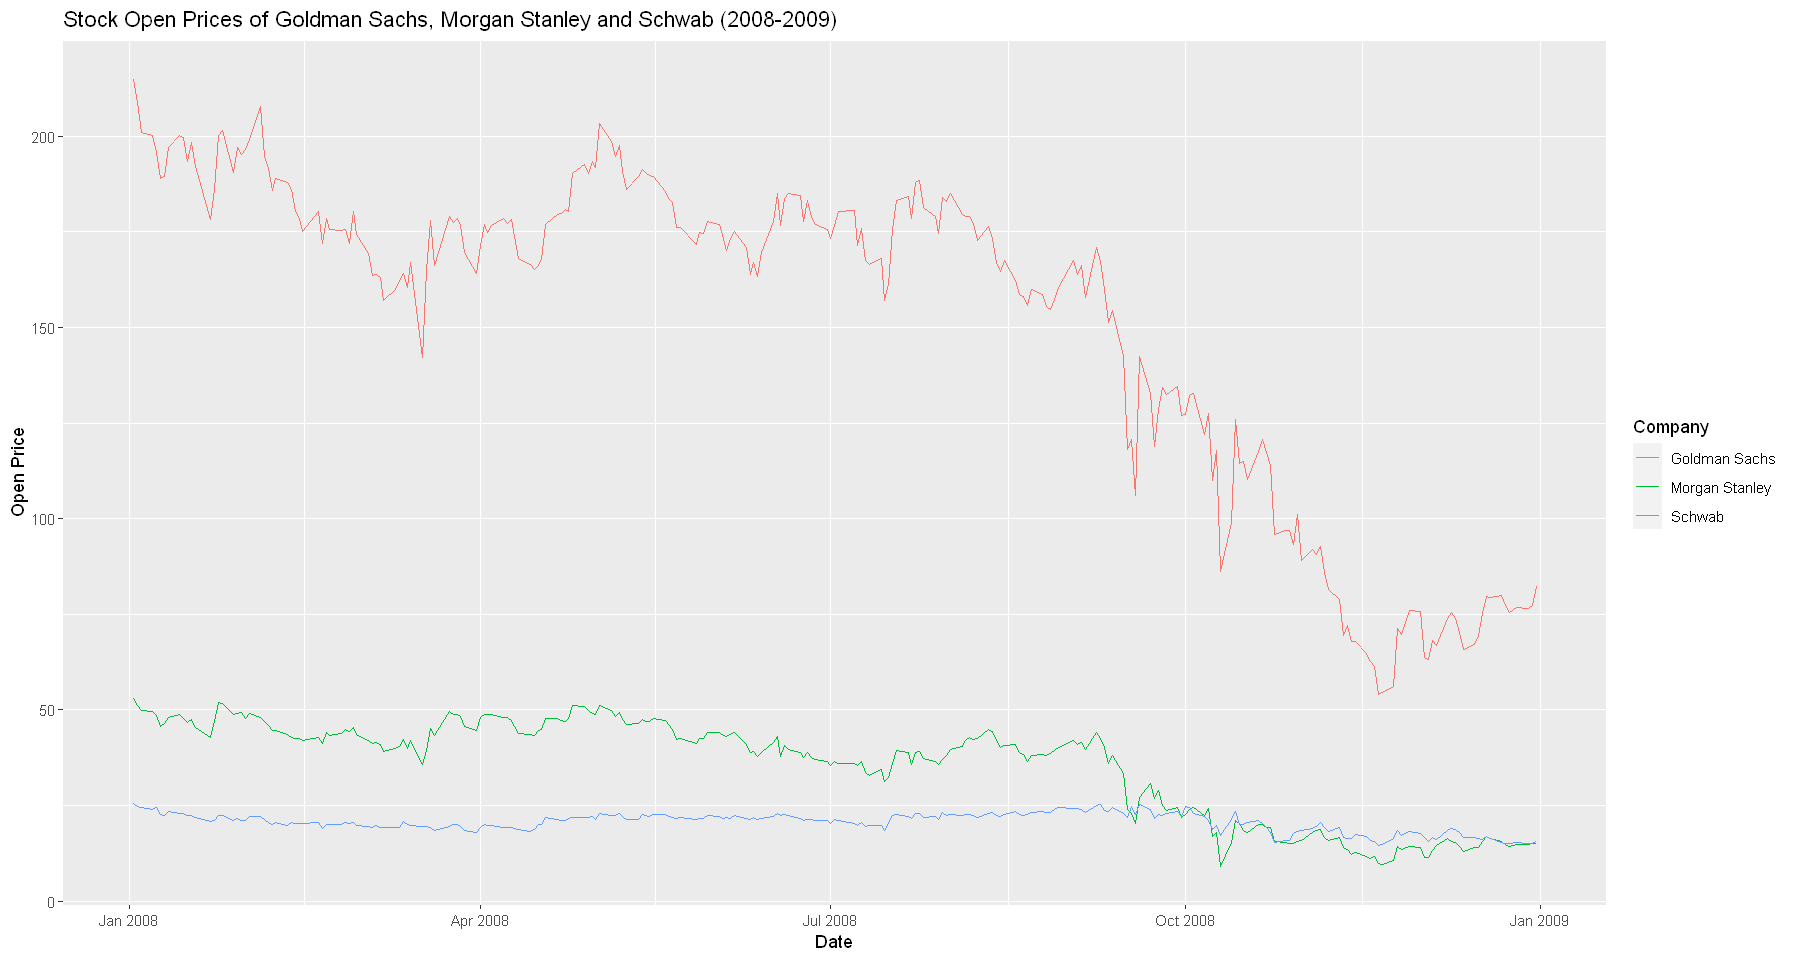

In [9]:
options(repr.plot.width=15, repr.plot.height=8)

Goldman_df <- GoldmanSachs %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Goldman Sachs")

Morgan_df <- MorganStanley %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Morgan Stanley")

Schwab_df <- Schwab %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2007 & year(Date) < 2009) %>%
  group_by(Year) %>%
  mutate(Company = "Schwab")

Grouped.df <- bind_rows(Goldman_df, Morgan_df, Schwab_df)

ggplot(Grouped.df, aes(x = Date, y = Open, group = interaction(Company, Year), color = Company)) +
  geom_line() +
  labs(title = "Stock Open Prices of Goldman Sachs, Morgan Stanley and Schwab (2008-2009)",
       x = "Date", y = "Open Price")

In [ ]:
# At the beginning of the Great Recession (December 2007), stock prices were up due to more demand of stocks. 
# The stocks fluctuate throughout the first part of 2008 as the recession went on, stocks were not bought as much. 
# September of 2008, Goldman Sachs stocks started going down at a faster pace than Morgan Stanley and Schwab due to stocks 
# being sold due to less demand.

# Goldman Sach was selling short term stocks in 2007. The short term success was great for Goldman Sachs even if it meant 
# bad publicity. The national financial crisis caused the stock market crash and the housing market crash. Goldman Sachs started 
# exploiting buyer illusions that the mortgage backed securities were worth purchasing causing them to settle for $5 million.

#


In [ ]:
# What effect did the Housing Market Downfall
options(repr.plot.width=15, repr.plot.height=8)

Goldman_df <- GoldmanSachs %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2019) %>%
  group_by(Year) %>%
  mutate(Company = "Goldman Sachs")

Morgan_df <- MorganStanley %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2019) %>%
  group_by(Year) %>%
  mutate(Company = "Morgan Stanley")

Schwab_df <- Schwab %>%
  select(Date, Open) %>%
  mutate(Year = year(Date)) %>%
  filter(year(Date) > 2019) %>%
  group_by(Year) %>%
  mutate(Company = "Schwab")

Grouped.df <- bind_rows(Goldman_df, Morgan_df, Schwab_df)

ggplot(Grouped.df, aes(x = Date, y = Open, group = interaction(Company, Year), color = Company)) +
  geom_line() +
  labs(title = "Stock Open Prices of Goldman Sachs, Morgan Stanley and Schwab (2020-2021)",
       x = "Date", y = "Open Price")